# Visualising Intermediate Activations

Inspired by [Chollet](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb)

In [1]:
from keras.models import load_model

model = load_model('cats_and_dogs.h5')

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
__________

In [3]:
img_path = "data/src_viz/cat.jpg"

In [4]:
from keras.preprocessing import image
import numpy as np

In [7]:
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)

In [8]:
img_array.shape

(128, 128, 3)

In [9]:
img_array = np.expand_dims(img_array, axis=0)

In [10]:
img_array.shape

(1, 128, 128, 3)

In [11]:
img_array /= 255.

In [12]:
import matplotlib.pyplot as plt

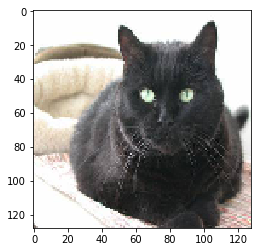

In [15]:
plt.imshow(img_array[0]);

In [16]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, output=layer_outputs)

/Users/anthonyn/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
activations = activation_model.predict(img_array)

In [20]:
first_layer_actication = activations[0]
print(first_layer_actication.shape)

(1, 126, 126, 32)


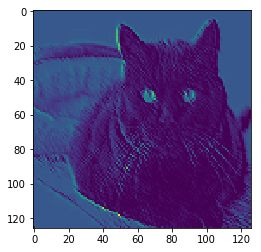

In [22]:
plt.imshow(first_layer_actication[0, :, :, 4], cmap='viridis');

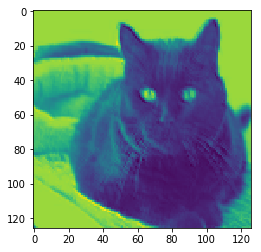

In [36]:
plt.imshow(first_layer_actication[0, :, :, 0]);

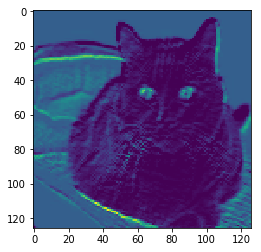

In [37]:
plt.imshow(first_layer_actication[0, :, :, 8]);

In [46]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

In [47]:
layer_names

['conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3']

In [48]:
images_per_row = 16

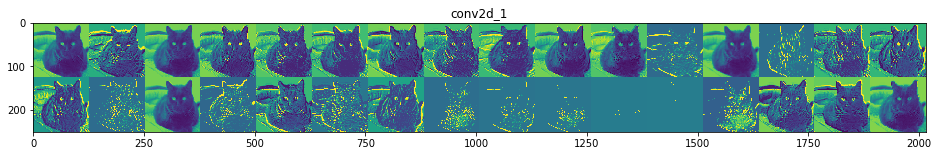

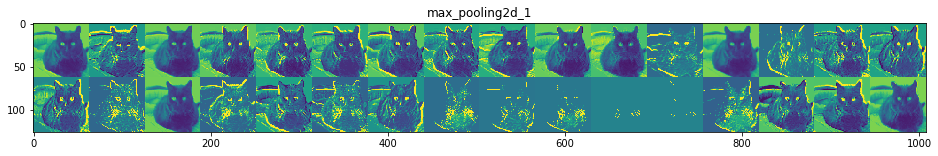

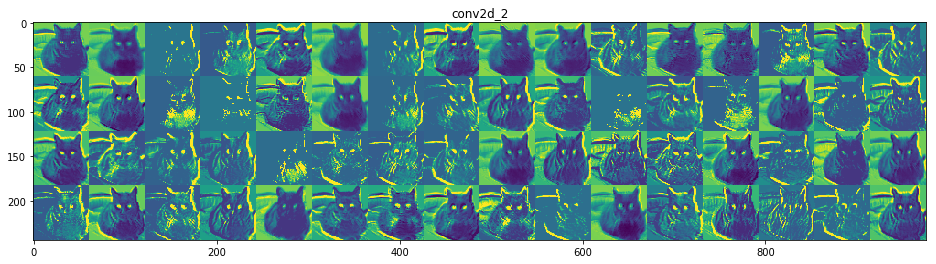

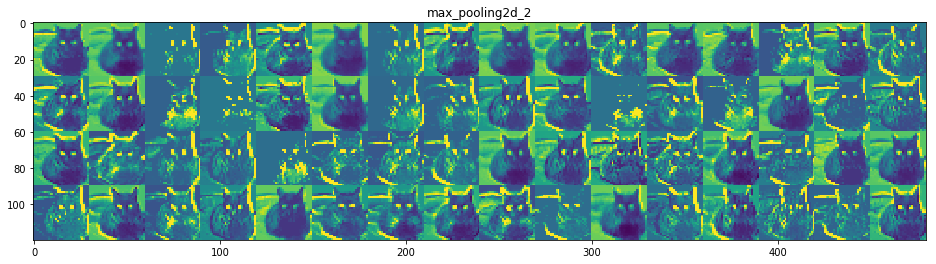

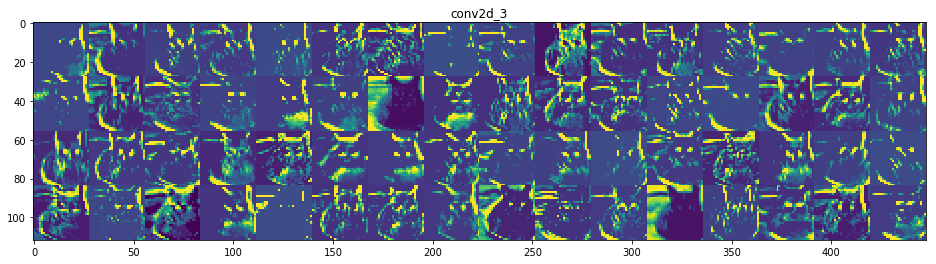

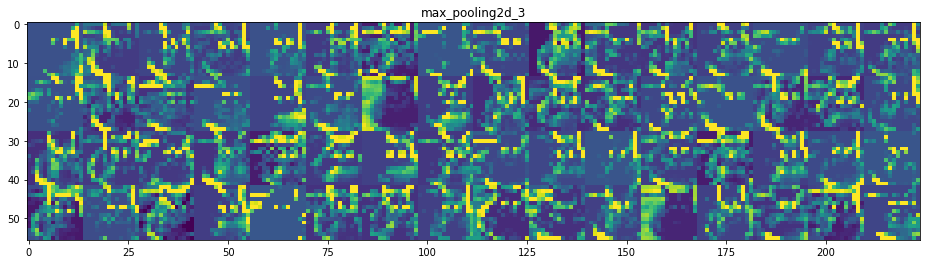

In [50]:
for layer_name, layer_activation in zip(layer_names, activations):    # display feature maps
    n_features = layer_activation.shape[-1]    # number of features in the feature map
    
    size = layer_activation.shape[1]    # the feature map has shape (1, size, size, n_features)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], 
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

***

***